# Housing Price Prediction Assignment 
#### Author - Kingshuk Dey

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.


### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc. and do some EDA

In [1]:
# Importing required libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# hide warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# reading the dataset
houseprice = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns
print(houseprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Have a look at the data
houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Explore Numeric Variables

In [5]:
# Describe Numerical Variables
# 37 numerical variables
houseprice.describe(percentiles=[0.1,0.25,0.50,0.75,0.90,0.95,0.99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Id,1460.0,730.500000,421.610009,1.0,146.9,365.75,730.5,1095.25,1314.1,1387.05,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,44.0,59.00,69.0,80.00,96.0,107.00,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,5000.0,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1924.9,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.0,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.00,0.0,166.00,335.0,456.00,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,0.00,383.5,712.25,1065.5,1274.00,1572.41,5644.0


#### Following attributes may have outliers as there is a visible difference between the value at 99th percentile and the max value
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- SalePrice

#### Max value of all the Year columns is '2010'
- YearBuilt
- YearRemodAdd
- GarageYrBlt
- YrSold

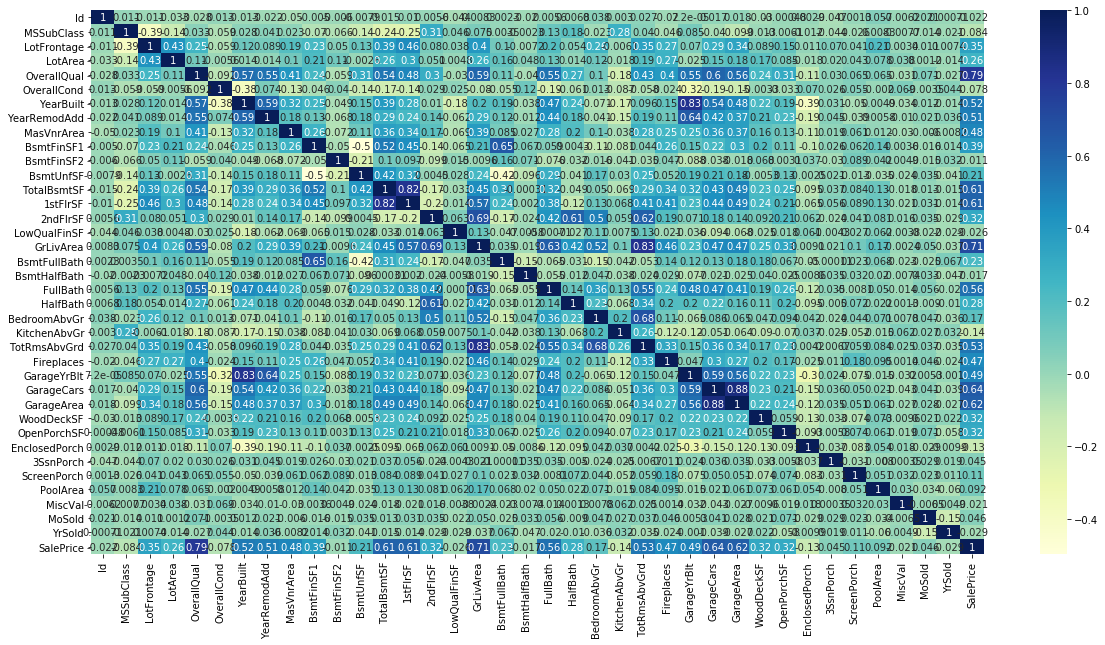

In [6]:
# Heatmap
plt.figure(figsize=(20,10))
cor = houseprice.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Some of the observations from the above heatmap are mentioned below:

#### SalePrice Strongly correlated with the below variables
- OverallQual (0.79)
- GrLivArea (0.71)
- GarageCars (0.64)
- GarageArea (0.62)
- TotalBsmtSF (0.61)
- 1stFlrSF (0.61)
- FullBath (0.56)
- TotRmsAbvGrd (0.53)

#### SalePrice Moderately Correlated with the below independent variables
- YearBuilt
- YearRemodAdd 
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- 2ndFlrSF
- BsmtFullBath
- HalfBath
- Fireplaces
- GarageYrBlt
- WoodDeskSF
- OpenPorchSF

#### SalePrice weakly correlated with the below independent variables
- MSSubClass (0.084)
- OverallCond (0.07)
- BsmtFinSF1 (0.01)
- LowQualFinSF (0.02)
- BedroomAbvGrb (0.17)
- KitchenAbvGrd (-0.14)
- EnclosedPorch (-0.13)
- 3SsnPorch (0.045)
- ScreenPorch (0.045)
- PoolArea (0.09)
- MiscVal (0.04)
- MoSold (0.04)
- YrSold (0.02)

#### Srongly (positive) correlated independent variables
- 1stFlrSF - TotalBsmtSF (0.82)
- GarageCars - GarageArea (0.88)
- GrLivArea - TotRmsAbvGrd (0.83)
- GrLivArea - 2ndFlrSF (0.69)
- GrLivArea - FullBath (0.63)
- BsmtFinSF1 - BsmtFullBath (0.65)
- GarageYrBlt - YearBlt (0.83)
- GarageYrBlt - YearRemodAdd 
- BedroomAbvGr - TotRoomsAbvGrd (0.68)

#### Plot the Target variable

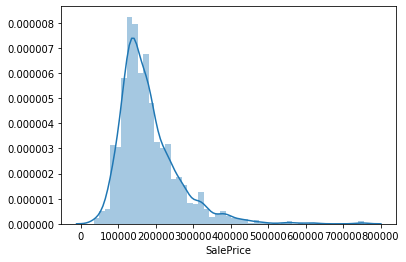

In [7]:
sns.distplot(houseprice['SalePrice'])
plt.show()

In [8]:
houseprice['SalePrice'].skew()

1.8828757597682129

    SalePrice is slightly right skewed. We will handle skew at the Data preparation section.

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


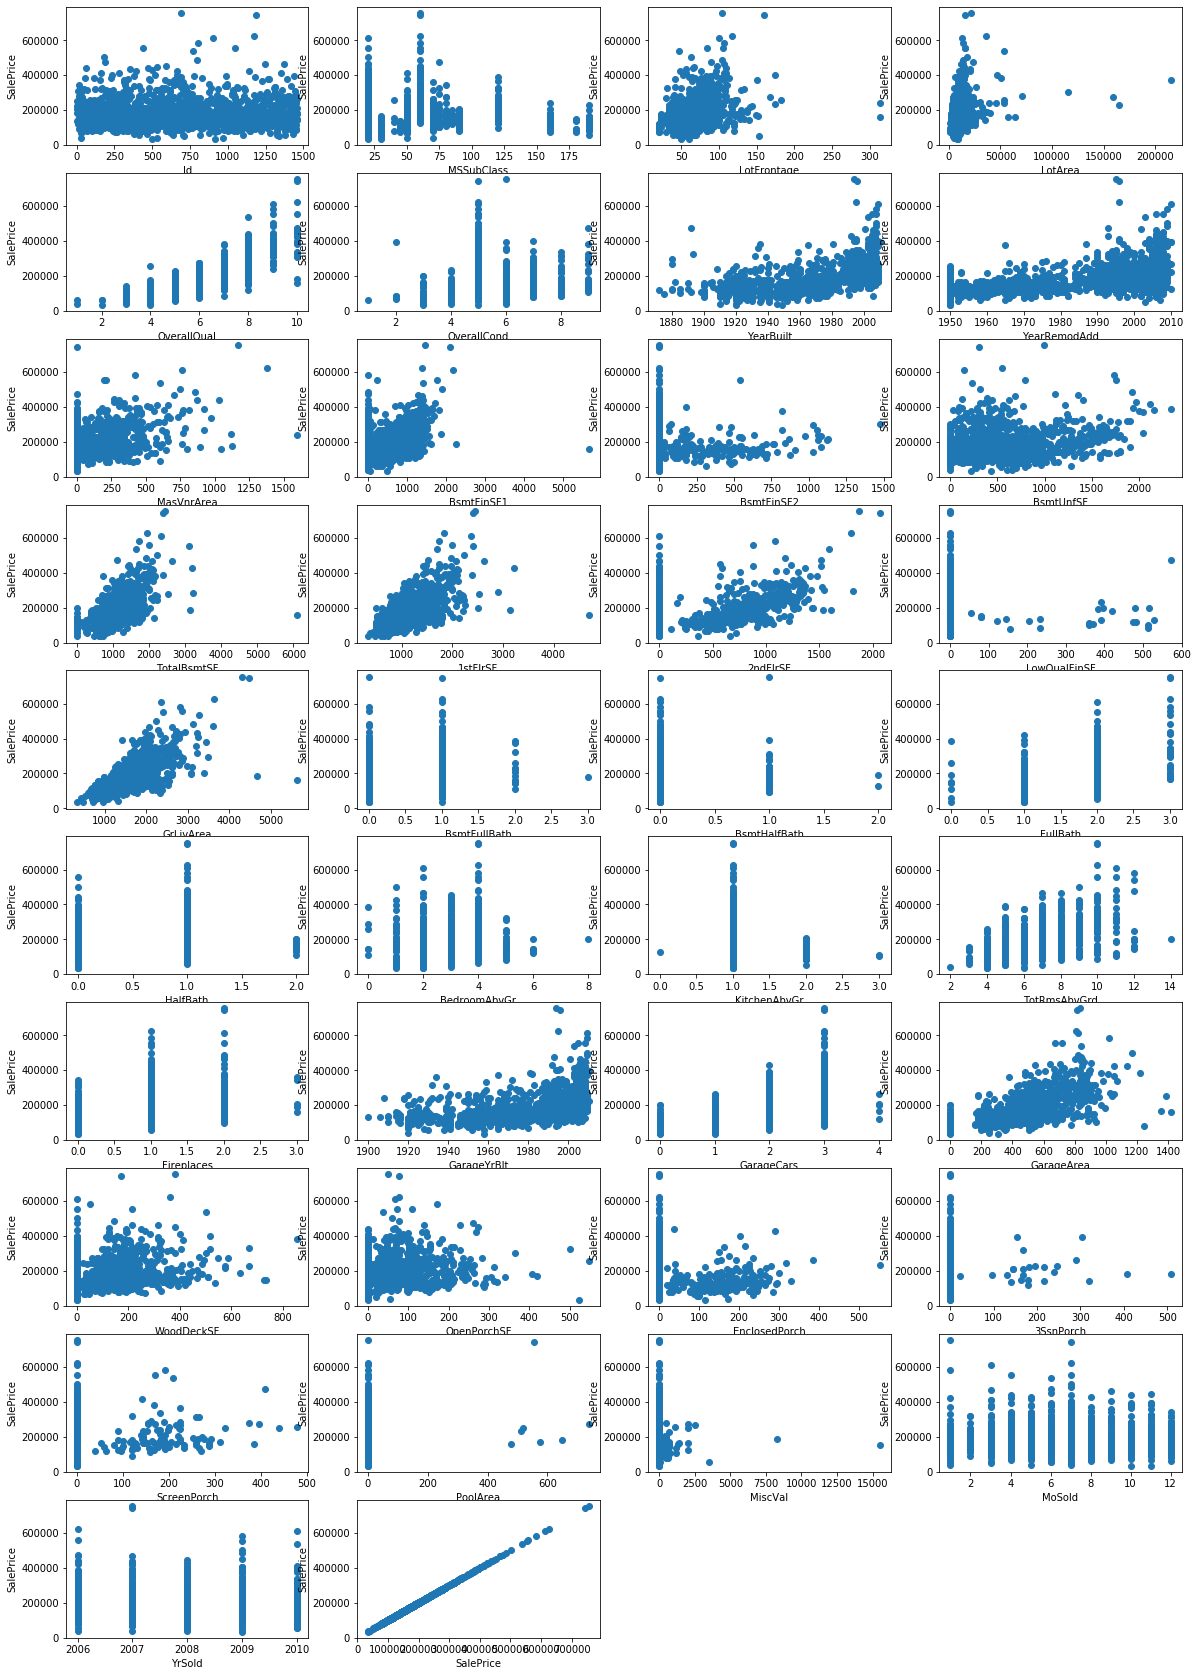

In [9]:
# Pair plot of Independent numerical variables vs SalePrice
def pair_plot(num_var):
    plt.figure(figsize=(20, 30))
    for i in range(len(num_var)):
        plt.subplot(10,4,i+1)
        plt.scatter(houseprice[num_var[i]],houseprice.SalePrice)
        plt.xlabel(num_var[i])
        plt.ylabel("SalePrice")
    plt.show()

vars = list(houseprice.columns[houseprice.dtypes != 'object'])
print(vars)
pair_plot(vars)

Based on the plots above, it can be observed that some of the numeric variables are actually categorical in nature.

Now let's plot dsitributions of numerical feature variables.

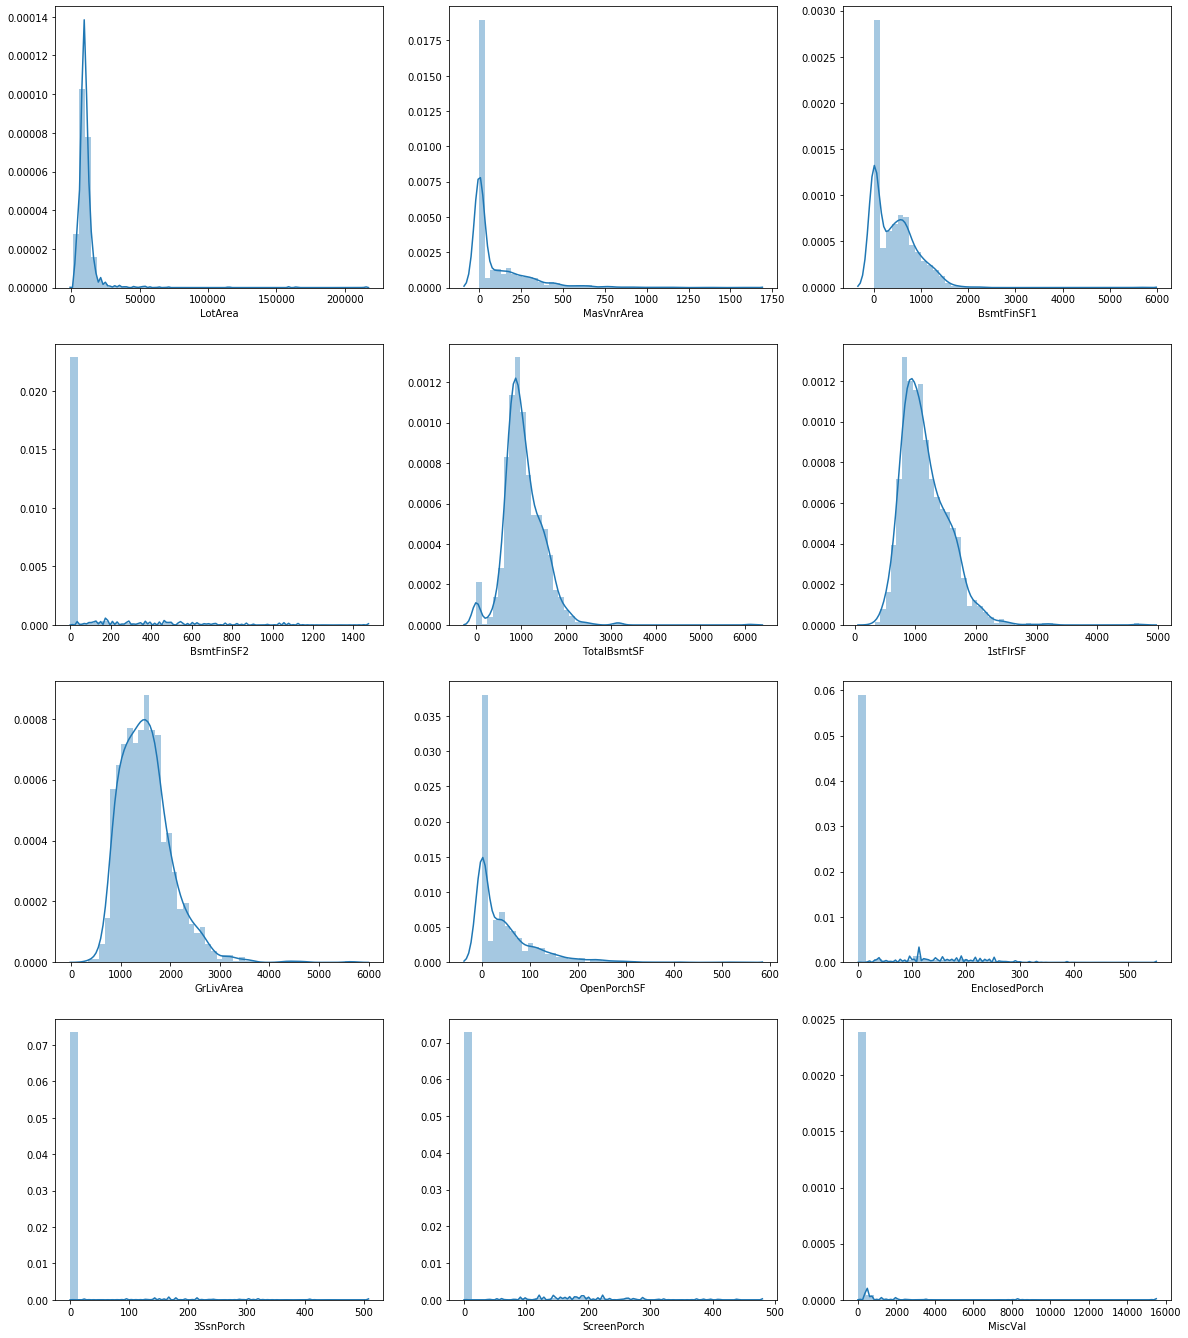

In [10]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'MiscVal']
plt.figure(figsize=(20,30))
plt.subplot(5,3,1)
sns.distplot(houseprice['LotArea'])
plt.subplot(5,3,2)
sns.distplot(houseprice['MasVnrArea'])
plt.subplot(5,3,3)
sns.distplot(houseprice['BsmtFinSF1'])
plt.subplot(5,3,4)
sns.distplot(houseprice['BsmtFinSF2'], kde_kws={'bw':0.1})
plt.subplot(5,3,5)
sns.distplot(houseprice['TotalBsmtSF'])
plt.subplot(5,3,6)
sns.distplot(houseprice['1stFlrSF'])
plt.subplot(5,3,7)
sns.distplot(houseprice['GrLivArea'])
plt.subplot(5,3,8)
sns.distplot(houseprice['OpenPorchSF'])
plt.subplot(5,3,9)
sns.distplot(houseprice['EnclosedPorch'],kde_kws={'bw':0.1})
plt.subplot(5,3,10)
sns.distplot(houseprice['3SsnPorch'],kde_kws={'bw':0.1})
plt.subplot(5,3,11)
sns.distplot(houseprice['ScreenPorch'],kde_kws={'bw':0.1})
plt.subplot(5,3,12)
sns.distplot(houseprice['MiscVal'],kde_kws={'bw':0.1})
plt.show()

From the above distribution plots some skew is visible in the variables

In [11]:
# Further analysis to find skew() values of each variables
from scipy.stats import norm, skew
numeric_features = houseprice.dtypes[houseprice.dtypes != "object"].index

# Check the skew of all numerical features
skewed_features = houseprice[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


We will further look into handling skewness of these variables in the data preparation section

In [12]:
# Describe Categorical variables
houseprice.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


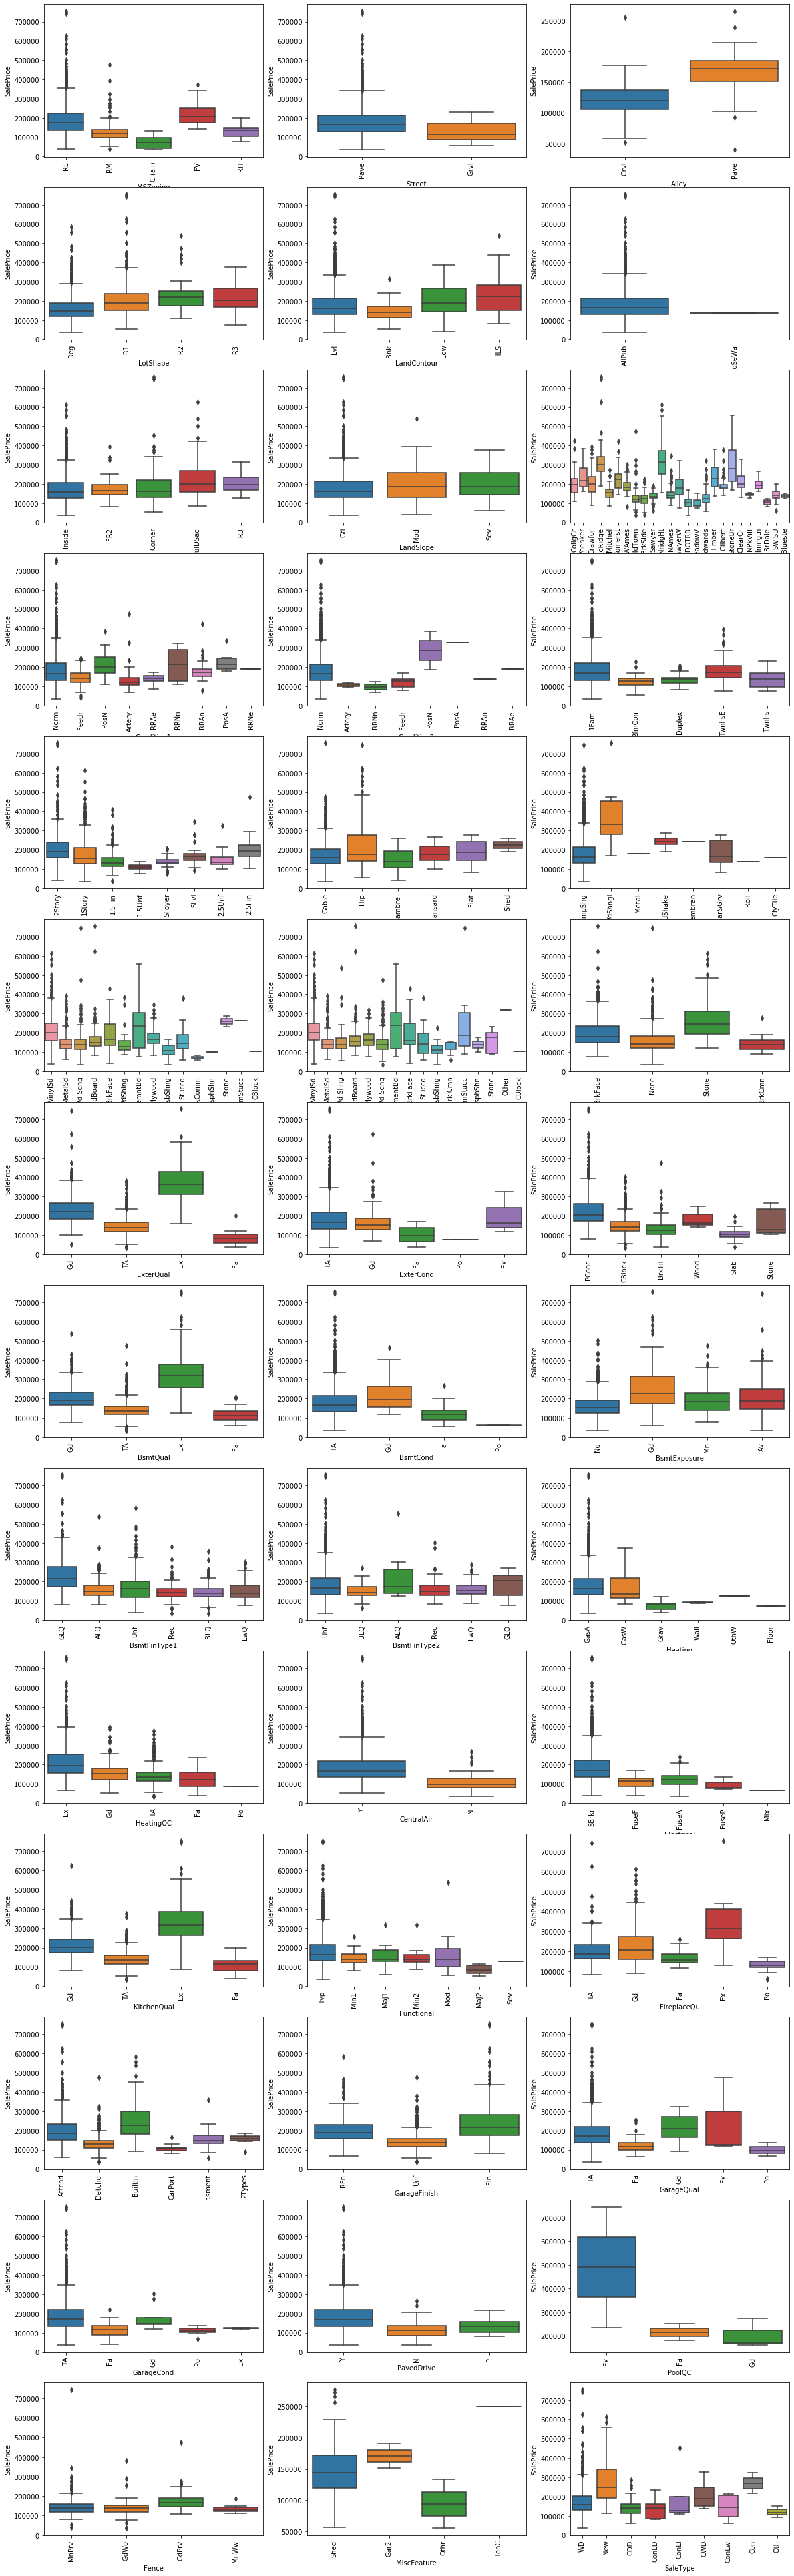

In [13]:
#Function to create boxplot for the categorical variables
def plot_box(cat_vars):
    plt.figure(figsize=(20, 100))
    plt.tight_layout(pad=3.0)
    for i in range(len(cat_vars)):
        plt.subplot(20,3,i+1)
        s=sns.boxplot(x = cat_vars[i], y = 'SalePrice', data = houseprice)
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show()
    
cat_vars=list(houseprice.columns[houseprice.dtypes == 'object'])
print(cat_vars)

plot_box(cat_vars[:-1])

##### From the above boxplots categories can be identified which are impacting the price the most
For example: 
- 'MSZoning' - Prices are higher for MSZoning FV (Floating Village Residential)
- 'Street' - Prices are higher for Street type Pave
- 'Alley' - Prices arre higher for Alley type Pave
- 'LotShape' - Slightly higher for IR2 (Moderately Irregular)
- 'LandContour' - Prices are higher for  HL5 (Hillside - Significant slope from side to side)
- 'Utilities' - Prices are higher for AllPub (All public Utilities (E,G,W,& S))
- 'Neighborhood' - Prices are higher for neighbourhoods Northridge Heights and Stone Brook

### 2. Data Cleaning & Data Preparation

#### Check for NULL or missing values

In [14]:
round(houseprice.isnull().sum()/len(houseprice.index)*100,2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

#### Following columns can be dropped as they have high NULL percentage
- PoolQC           
- Fence
- MiscFeature
- Alley
- FireplaceQu      

In [15]:
#Drop columns having more than 47% NULL values
houseprice = houseprice.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis=1)

In [16]:
# Remaining Missing value columns
round(houseprice.isnull().sum()/len(houseprice.index)*100,2).sort_values(ascending=False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

#### Treating outlier

A lower cap of 10th percentile and upper cap of 99th percentile has been considered for the selected variables

In [17]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.10)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

houseprice = drop_outliers(houseprice)

In [18]:
houseprice.shape

(1433, 76)

#### Missing value imputation

In [19]:
# DataType Float64, imputing with mean
houseprice.LotFrontage.fillna(houseprice.LotFrontage.mean(),inplace=True)
houseprice.MasVnrArea.fillna(houseprice.MasVnrArea.mean(),inplace=True)

# Age missing values impute with '-1'
houseprice.GarageYrBlt.fillna(-1,inplace=True)

# Datatype 'Object', imputing with values given in the Data Dictionary for 'NA' 
# (as there is a category NA which represents missing values)
houseprice.GarageFinish.fillna('No Garage',inplace=True)
houseprice.GarageQual.fillna('No Garage',inplace=True)
houseprice.GarageCond.fillna('No Garage',inplace=True)
houseprice.GarageType.fillna('No Garage',inplace=True)
houseprice.BsmtExposure.fillna('No Basement',inplace=True)
houseprice.BsmtFinType1.fillna('No Basement',inplace=True)
houseprice.BsmtFinType2.fillna('No Basement',inplace=True)
houseprice.BsmtCond.fillna('No Basement',inplace=True)
houseprice.BsmtQual.fillna('No Basement',inplace=True)

In [20]:
# For these variables imputing missing values with the value having highest frequency
houseprice.MasVnrType.fillna(houseprice['MasVnrType'].mode().iloc[0],inplace=True)
houseprice.Electrical.fillna(houseprice['Electrical'].mode().iloc[0],inplace=True)

In [21]:
# Check for Missing values
round(houseprice.isnull().sum()/len(houseprice.index)*100,2).sort_values(ascending=False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [22]:
#Drop Id field as it will not help in sale price prediction
houseprice.drop(['Id'],axis=1,inplace=True)

#### Feature Engineering

In [23]:
# Convert years to age/elapsed time
houseprice['Age_of_property'] = 2020-houseprice.YearBuilt
houseprice['Age_Since_Remodel'] = 2020-houseprice.YearRemodAdd
houseprice['Years_Since_Sold'] = 2020-houseprice.YrSold

# Convert years to age where it's not '-1'
houseprice['Age_of_Garage'] = houseprice.GarageYrBlt.apply(lambda x: 2020-x if x >= 0 else x)

houseprice[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','Age_of_property','Age_Since_Remodel',
             'Age_of_Garage','Years_Since_Sold']].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Age_of_property,Age_Since_Remodel,Age_of_Garage,Years_Since_Sold
0,2003,2003,2003.0,2008,17,17,17.0,12
1,1976,1976,1976.0,2007,44,44,44.0,13
2,2001,2002,2001.0,2008,19,18,19.0,12
3,1915,1970,1998.0,2006,105,50,22.0,14
4,2000,2000,2000.0,2008,20,20,20.0,12
5,1993,1995,1993.0,2009,27,25,27.0,11
6,2004,2005,2004.0,2007,16,15,16.0,13
7,1973,1973,1973.0,2009,47,47,47.0,11
8,1931,1950,1931.0,2008,89,70,89.0,12
9,1939,1950,1939.0,2008,81,70,81.0,12


In [24]:
# Drop Year columns
houseprice=houseprice.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [25]:
houseprice.shape

(1433, 75)

In [26]:
houseprice.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_of_property,Age_Since_Remodel,Years_Since_Sold,Age_of_Garage
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.00000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.0,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,56.870202,69.556213,10013.244243,6.086532,5.575017,103.348918,434.968597,45.759944,568.902303,1049.630844,1155.91626,344.117237,5.681089,1505.714585,0.419400,0.057223,1.558967,0.382415,2.861828,1.045359,6.503140,0.602233,1.765527,471.607118,93.471738,46.279833,21.741800,3.119330,14.920447,0.0,17.092812,6.327285,179797.524075,48.830426,35.273552,12.183531,39.168179
std,42.227088,20.784946,5442.646824,1.377510,1.110572,180.427490,431.659342,160.665792,442.841135,415.431073,371.83259,432.631359,48.000024,505.917167,0.514416,0.238284,0.548784,0.501699,0.813916,0.217996,1.609642,0.634920,0.749868,212.876167,123.818836,65.834824,59.740748,26.412401,54.964481,0.0,109.206267,2.705971,77875.172956,30.277531,20.691583,1.328336,25.921568
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.00000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,34900.000000,10.000000,10.000000,10.000000,-1.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,224.000000,794.000000,882.00000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,129500.000000,20.000000,16.000000,11.000000,17.000000
50%,50.000000,69.556213,9430.000000,6.000000,5.000000,0.000000,378.000000,0.000000,481.000000,988.000000,1080.00000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,161750.000000,48.000000,27.000000,12.000000,35.000000
75%,70.000000,79.000000,11500.000000,7.000000,6.000000,166.000000,704.000000,0.000000,810.000000,1284.000000,1383.00000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,213000.000000,66.000000,54.000000,13.000000,58.000000
95%,160.000000,103.000000,16750.200000,8.000000,8.000000,451.400000,1260.400000,393.000000,1468.800000,1737.200000,1806.20000,1131.000000,0.000000,2448.800000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,848.400000,330.000000,172.000000,180.000000,0.000000,160.000000,0.0,0.000000,11.000000,325429.600000,104.000000,70.000000,14.000000,90.000000
99%,190.000000,130.000000,32241.240000,9.680000,9.000000,782.880000,1567.000000,835.240000,1798.400000,2131.200000,2183.84000,1399.920000,319.680000,3048.720000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,991.160000,498.400000,284.040000,257.400000,166.080000,265.680000,0.0,587.200000,12.000000,438259.680000,121.360000,70.000000,14.000000,103.360000
max,190.000000,313.000000,70761.000000,10.000000,9.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.00000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3

#### Remove columns with skewed data
Check numerical variables having same value in more than 85% rows. 

In [27]:
houseprice.groupby('3SsnPorch')['3SsnPorch'].count()/len(houseprice)*100

3SsnPorch
0      98.394976
23      0.069784
96      0.069784
130     0.069784
140     0.069784
144     0.139567
153     0.069784
162     0.069784
168     0.209351
180     0.139567
182     0.069784
196     0.069784
216     0.139567
238     0.069784
245     0.069784
290     0.069784
304     0.069784
320     0.069784
407     0.069784
Name: 3SsnPorch, dtype: float64

In [28]:
houseprice.groupby('EnclosedPorch')['EnclosedPorch'].count()/len(houseprice)*100

EnclosedPorch
0      85.694348
19      0.069784
20      0.069784
24      0.069784
30      0.069784
         ...    
294     0.069784
301     0.069784
318     0.069784
330     0.069784
386     0.069784
Name: EnclosedPorch, Length: 117, dtype: float64

In [29]:
houseprice.groupby('ScreenPorch')['ScreenPorch'].count()/len(houseprice)*100

ScreenPorch
0      92.044662
40      0.069784
53      0.069784
60      0.069784
63      0.069784
80      0.069784
90      0.209351
95      0.069784
99      0.069784
100     0.139567
116     0.069784
119     0.069784
120     0.348918
122     0.069784
126     0.209351
128     0.069784
130     0.069784
140     0.069784
142     0.139567
143     0.069784
144     0.209351
145     0.069784
147     0.209351
152     0.069784
153     0.069784
154     0.069784
155     0.069784
156     0.069784
160     0.209351
161     0.069784
163     0.069784
165     0.069784
168     0.139567
170     0.139567
175     0.069784
176     0.139567
178     0.069784
180     0.279135
182     0.069784
184     0.139567
185     0.069784
189     0.279135
190     0.069784
192     0.418702
197     0.069784
198     0.139567
200     0.139567
204     0.069784
210     0.069784
216     0.139567
220     0.069784
222     0.069784
224     0.348918
225     0.069784
233     0.069784
234     0.069784
252     0.069784
259     0.139567
26

In [30]:
houseprice.groupby('PoolArea')['PoolArea'].count()/len(houseprice)*100

PoolArea
0    100.0
Name: PoolArea, dtype: float64

In [31]:
houseprice.groupby('MiscVal')['MiscVal'].count()/len(houseprice)*100

MiscVal
0       97.069086
54       0.069784
350      0.069784
400      0.767620
450      0.279135
480      0.139567
500      0.488486
560      0.069784
600      0.279135
620      0.069784
700      0.279135
800      0.069784
1150     0.069784
1200     0.139567
1300     0.069784
1400     0.069784
Name: MiscVal, dtype: float64

In [32]:
houseprice.groupby('LowQualFinSF')['LowQualFinSF'].count()/len(houseprice)*100

LowQualFinSF
0      98.255408
53      0.069784
80      0.209351
120     0.069784
144     0.069784
156     0.069784
205     0.069784
232     0.069784
234     0.069784
360     0.139567
371     0.069784
384     0.069784
390     0.069784
397     0.069784
420     0.069784
473     0.069784
479     0.069784
481     0.069784
513     0.069784
514     0.069784
515     0.069784
528     0.069784
572     0.069784
Name: LowQualFinSF, dtype: float64

In [33]:
#Dropping the below variables as they have more than 90% values as zeroes
houseprice.drop(['3SsnPorch','EnclosedPorch','ScreenPorch','PoolArea','MiscVal','LowQualFinSF',],axis=1,inplace=True)

In [34]:
# Describe Categorical variables
houseprice.select_dtypes(include=['object']).describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433
unique,5,2,4,4,2,5,3,25,9,7,5,8,6,7,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1128,1428,910,1289,1432,1037,1359,221,1238,1419,1197,714,1124,1409,508,498,852,896,1261,634,640,1287,939,425,1237,1402,725,1339,1308,726,1336,849,600,1286,1301,1315,1244,1179


Check for categorical variables having same value in more than 95% of the rows

In [35]:
houseprice.groupby('Street')['Street'].count()/len(houseprice)*100

Street
Grvl     0.348918
Pave    99.651082
Name: Street, dtype: float64

In [36]:
houseprice.groupby('Utilities')['Utilities'].count()/len(houseprice)*100

Utilities
AllPub    99.930216
NoSeWa     0.069784
Name: Utilities, dtype: float64

In [37]:
houseprice.groupby('Condition2')['Condition2'].count()/len(houseprice)*100

Condition2
Artery     0.139567
Feedr      0.418702
Norm      99.023029
PosA       0.069784
PosN       0.139567
RRAn       0.069784
RRNn       0.139567
Name: Condition2, dtype: float64

In [38]:
houseprice.groupby('RoofMatl')['RoofMatl'].count()/len(houseprice)*100

RoofMatl
CompShg    98.325192
Membran     0.069784
Metal       0.069784
Roll        0.069784
Tar&Grv     0.697837
WdShake     0.348918
WdShngl     0.418702
Name: RoofMatl, dtype: float64

In [39]:
houseprice.groupby('Heating')['Heating'].count()/len(houseprice)*100

Heating
Floor     0.069784
GasA     97.836706
GasW      1.186322
Grav      0.488486
OthW      0.139567
Wall      0.279135
Name: Heating, dtype: float64

In [40]:
# Below Categorical variables have same value for more than 95% of the rows, so dropping the variables
houseprice.drop(['Street','Utilities','Condition2','RoofMatl','Heating'],axis=1,inplace=True)

In [41]:
houseprice.shape

(1433, 64)

#### Derive new feature

In [42]:
# Derive new feature i.e. the total square feet area 
houseprice['TotalSF'] = houseprice['TotalBsmtSF'] + houseprice['1stFlrSF'] + houseprice['2ndFlrSF']

In [43]:
# Number of Categorical variables
houseprice.columns[houseprice.dtypes=='object'].shape[0]

33

In [44]:
# Number of Continuous variables
houseprice.columns[houseprice.dtypes!='object'].shape[0]

32

#### Target Variable
Let's have a look at the distribution of the Target variable: SalePrice


 mu = 179797.52 and sigma = 77848.00



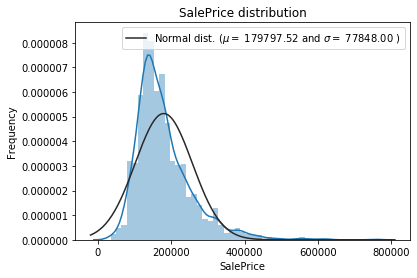

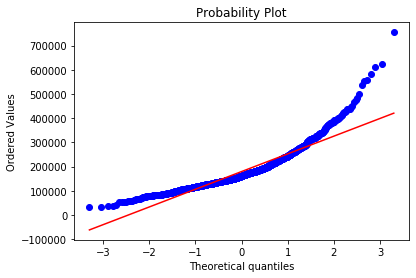

In [45]:
sns.distplot(houseprice.SalePrice,fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(houseprice['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
from scipy import stats
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(houseprice['SalePrice'], plot=plt)
plt.show()

In [46]:
# Skewness before transformation
houseprice.SalePrice.skew()

1.7642529409811378

From the above plots it can be observed that the target variable is right skewed. As one of the assumption of the model is to have target variables normally distributed, we will apply log transaformation on the target variable.

#### Log transformation of the Target variable

In [47]:
houseprice["SalePrice"] = np.log1p(houseprice["SalePrice"])


 mu = 12.02 and sigma = 0.40



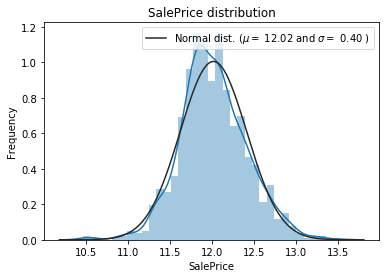

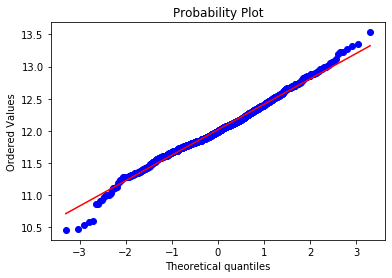

In [48]:
sns.distplot(houseprice.SalePrice,fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(houseprice['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
from scipy import stats
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(houseprice['SalePrice'], plot=plt)
plt.show()

In [49]:
houseprice['SalePrice'].skew()

0.11343219136516525

Post transformaton Significant reduction in skewness can be observed. Also now the variable is more normally distributed. 

In [50]:
houseprice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Age_of_property,Age_Since_Remodel,Years_Since_Sold,Age_of_Garage,TotalSF
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,2,WD,Normal,12.247699,17,17,12,17.0,2566
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,5,WD,Normal,12.109016,44,44,13,44.0,2524
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,9,WD,Normal,12.317171,19,18,12,19.0,2706
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,2,WD,Abnorml,11.849405,105,50,14,22.0,2473
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,12,WD,Normal,12.429220,20,20,12,20.0,3343


##### Handling categorical variables

In [51]:
# Get the distinct values for each categorical variables
cat_vars = houseprice.select_dtypes(include=['object'])

def get_distinct_vals(var):
    for col in cat_vars:
        print('Distinct values for column ',col)
        print(houseprice[col].unique())

get_distinct_vals(cat_vars)
print(list(cat_vars.columns))

Distinct values for column  MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Distinct values for column  LotShape
['Reg' 'IR1' 'IR2' 'IR3']
Distinct values for column  LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Distinct values for column  LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Distinct values for column  LandSlope
['Gtl' 'Mod' 'Sev']
Distinct values for column  Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Distinct values for column  Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Distinct values for column  BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Distinct values for column  HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Distinct values for column  RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat

#### Label encoding

In [52]:
#Below attributes seems to be Ordinal in nature as they have ordered categories
houseprice[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [53]:
# Transform them with ordered numbers
houseprice['LandSlope'] = houseprice.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
houseprice['ExterQual'] = houseprice.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['BsmtQual'] = houseprice.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice['BsmtCond'] = houseprice.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice['BsmtExposure'] = houseprice.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
houseprice['BsmtFinType1'] = houseprice.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
houseprice['BsmtFinType2'] = houseprice.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
houseprice['HeatingQC'] = houseprice.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['CentralAir'] = houseprice.CentralAir.map({'N':0,'Y':1})
houseprice['KitchenQual'] = houseprice.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['GarageFinish'] = houseprice.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
houseprice['GarageQual'] = houseprice.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice['GarageCond'] = houseprice.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice['ExterCond'] = houseprice.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['LotShape'] = houseprice.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [54]:
houseprice[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Frequency encoding
From analysis it has been observed that if Dummy variables are created, top predictor variables list gets categories from same variable. Also number of features will increase unnecessarily. So applied Frequency encoding for the remaining categorical variables (not ordinal) which gives a stable and better result.

In [55]:
cols = ['LandContour','LotConfig','BldgType',
             'HouseStyle','RoofStyle','Exterior2nd','MasVnrType','Foundation',
             'Electrical','GarageType','PavedDrive','MSZoning', 'Neighborhood', 'Condition1', 
                                       'SaleCondition','Exterior1st','SaleType','Functional']

for var in cols:
    count=houseprice.groupby(var).size()/len(houseprice)
    houseprice[var]=houseprice[var].apply(lambda x: count[x])

In [56]:
houseprice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Age_of_property,Age_Since_Remodel,Years_Since_Sold,Age_of_Garage,TotalSF
0,60,0.78716,65.0,8450,3,0.899512,0.723657,0,0.103280,0.863922,0.835311,0.304257,7,5,0.784368,0.354501,0.347523,0.308444,196.0,3,2,0.442428,4,3,1,6,706,1,0,150,856,4,1,0.91277,856,854,1710,1,0,2,1,3,1,3,8,0.93231,0,0.592463,2,2,548,3,3,0.917655,0,61,2,0.868109,0.822749,12.247699,17,17,12,17.0,2566
1,20,0.78716,80.0,9600,3,0.899512,0.032798,0,0.007676,0.055129,0.835311,0.498255,6,8,0.784368,0.152128,0.147941,0.594557,0.0,2,2,0.434054,4,3,4,5,978,1,0,284,1262,4,1,0.91277,1262,0,1262,0,1,2,0,3,1,2,6,0.93231,1,0.592463,2,2,460,3,3,0.917655,298,0,5,0.868109,0.822749,12.109016,44,44,13,44.0,2524
2,60,0.78716,68.0,11250,0,0.899512,0.723657,0,0.103280,0.863922,0.835311,0.304257,7,5,0.784368,0.354501,0.347523,0.308444,162.0,3,2,0.442428,4,3,2,6,486,1,0,434,920,4,1,0.91277,920,866,1786,1,0,2,1,3,1,3,6,0.93231,1,0.592463,2,2,608,3,3,0.917655,0,42,9,0.868109,0.822749,12.317171,19,18,12,19.0,2706
3,70,0.78716,60.0,9550,0,0.899512,0.178646,0,0.034194,0.863922,0.835311,0.304257,7,5,0.784368,0.140963,0.025820,0.594557,0.0,2,2,0.101884,3,4,1,5,216,1,0,540,756,3,1,0.91277,961,756,1717,1,0,1,0,3,1,3,7,0.93231,1,0.268667,1,3,642,3,3,0.917655,0,35,2,0.868109,0.069086,11.849405,105,50,14,22.0,2473
4,60,0.78716,84.0,14260,0,0.899512,0.032798,0,0.027913,0.863922,0.835311,0.304257,8,5,0.784368,0.354501,0.347523,0.308444,350.0,3,2,0.442428,4,3,3,6,655,1,0,490,1145,4,1,0.91277,1145,1053,2198,1,0,2,1,4,1,3,9,0.93231,1,0.592463,2,3,836,3,3,0.917655,192,84,12,0.868109,0.822749,12.429220,20,20,12,20.0,3343


#### Split the data into independent and dependent variables

In [57]:
# Independent variables
X = houseprice.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Age_of_property,Age_Since_Remodel,Years_Since_Sold,Age_of_Garage,TotalSF
0,60,0.78716,65.0,8450,3,0.899512,0.723657,0,0.103280,0.863922,0.835311,0.304257,7,5,0.784368,0.354501,0.347523,0.308444,196.0,3,2,0.442428,4,3,1,6,706,1,0,150,856,4,1,0.91277,856,854,1710,1,0,2,1,3,1,3,8,0.93231,0,0.592463,2,2,548,3,3,0.917655,0,61,2,0.868109,0.822749,17,17,12,17.0,2566
1,20,0.78716,80.0,9600,3,0.899512,0.032798,0,0.007676,0.055129,0.835311,0.498255,6,8,0.784368,0.152128,0.147941,0.594557,0.0,2,2,0.434054,4,3,4,5,978,1,0,284,1262,4,1,0.91277,1262,0,1262,0,1,2,0,3,1,2,6,0.93231,1,0.592463,2,2,460,3,3,0.917655,298,0,5,0.868109,0.822749,44,44,13,44.0,2524
2,60,0.78716,68.0,11250,0,0.899512,0.723657,0,0.103280,0.863922,0.835311,0.304257,7,5,0.784368,0.354501,0.347523,0.308444,162.0,3,2,0.442428,4,3,2,6,486,1,0,434,920,4,1,0.91277,920,866,1786,1,0,2,1,3,1,3,6,0.93231,1,0.592463,2,2,608,3,3,0.917655,0,42,9,0.868109,0.822749,19,18,12,19.0,2706
3,70,0.78716,60.0,9550,0,0.899512,0.178646,0,0.034194,0.863922,0.835311,0.304257,7,5,0.784368,0.140963,0.025820,0.594557,0.0,2,2,0.101884,3,4,1,5,216,1,0,540,756,3,1,0.91277,961,756,1717,1,0,1,0,3,1,3,7,0.93231,1,0.268667,1,3,642,3,3,0.917655,0,35,2,0.868109,0.069086,105,50,14,22.0,2473
4,60,0.78716,84.0,14260,0,0.899512,0.032798,0,0.027913,0.863922,0.835311,0.304257,8,5,0.784368,0.354501,0.347523,0.308444,350.0,3,2,0.442428,4,3,3,6,655,1,0,490,1145,4,1,0.91277,1145,1053,2198,1,0,2,1,4,1,3,9,0.93231,1,0.592463,2,3,836,3,3,0.917655,192,84,12,0.868109,0.822749,20,20,12,20.0,3343


In [58]:
# target or dependent variable
y = houseprice['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scale independent variables

In [59]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SaleType',
       'SaleCondition', 'Age_of_property', 'Age_Since_Remodel',
       'Years_Since_Sold', 'Age_of_Garage', 'T

In [60]:
X.shape

(1433, 64)

In [61]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

#### Recursive feature elimination (RFE)
As the number of features kept within limit by avoiding dummy variables encoding, RFE will not be required.

## 3. Model Building and Evaluation

### Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

In [62]:
# list of alphas to tune

params = {'alpha': [0.001, 0.001, 0.1, 0.5, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 500.0, 1000.0 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.001, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0,
                                   60.0, 70.0, 80.0, 90.0, 100.0, 500.0,
                                   1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
20,100,-0.083608,-0.090145,1
19,90,-0.083532,-0.090194,2
18,80,-0.083461,-0.090260,3
17,70,-0.083399,-0.090353,4
16,60,-0.083343,-0.090466,5
15,50,-0.083297,-0.090594,6
14,20,-0.083303,-0.091274,7
13,10,-0.083398,-0.091644,8
12,9,-0.083412,-0.091686,9
11,8,-0.083428,-0.091731,10


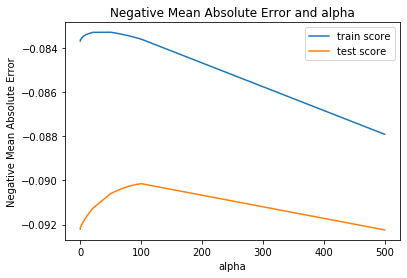

In [64]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
# get the best estimator for lambda
print(ridge_model_cv.best_estimator_)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [66]:
# Get the model parameters
ridge = Ridge(alpha=100.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)

mse=mean_squared_error(y_test, y_test_pred)
rmse=sqrt(mse)
print('Train R2 Score:', r2_train)
print('Model R2 Score:',r2_test)
print('Model MSE:', mse)
print('Model RMSE:',rmse)

Train R2 Score: 0.9055134995907557
Model R2 Score: 0.8794925949291289
Model MSE: 0.017884441856382785
Model RMSE: 0.1337327254503653


In [67]:
# check the coefficient values with lambda = 100
ridge.coef_

array([-4.09711284e-03,  1.38019251e-02,  1.03286751e-02,  2.40975585e-02,
       -1.06259551e-03,  4.49875561e-03, -6.43473902e-03,  7.49340431e-03,
       -4.40648796e-03,  1.84138248e-02,  3.67798139e-03,  2.69335466e-04,
        6.97264438e-02,  3.74241792e-02, -8.00770909e-03, -4.98521430e-03,
        6.33395345e-03,  4.86906355e-03,  5.78360696e-03,  1.92801107e-02,
       -3.53724378e-03,  2.00816683e-03,  1.81126153e-02, -8.32054528e-03,
        7.71182991e-03,  8.25261416e-03,  1.46195181e-02, -7.23964764e-03,
        6.86389138e-03,  1.94813637e-03,  1.99218585e-02,  1.85608474e-02,
        1.69832334e-02,  4.26582520e-04,  2.20407757e-02,  1.99199281e-02,
        3.72726297e-02,  1.81255328e-02,  6.17515221e-05,  2.11915855e-02,
        1.26809223e-02,  5.12895732e-03, -7.52790690e-03,  1.91763222e-02,
        1.73634023e-02,  2.13082610e-02,  2.91951468e-02,  1.16951252e-02,
        9.47673543e-03,  1.63516064e-02,  2.72585661e-02,  2.43992281e-03,
        5.55736200e-03,  

In [68]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False).head(15)

,Features,Coefficient
12,OverallQual,0.0697
13,OverallCond,0.0374
36,GrLivArea,0.0373
63,TotalSF,0.0324
46,Fireplaces,0.0292
50,GarageArea,0.0273
3,LotArea,0.0241
34,1stFlrSF,0.0220
45,Functional,0.0213
39,FullBath,0.0212


### Lasso Regression
Let's build the Lasso Regression model and see the performance

In [69]:
lasso = Lasso()

# list of alphas to tune

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [70]:
lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.004,-0.083549,-0.089222,1
9,0.005,-0.083845,-0.089239,2
7,0.003,-0.083311,-0.089492,3
6,0.002,-0.083082,-0.089860,4
5,0.001,-0.083124,-0.090632,5
10,0.01,-0.085997,-0.090636,6
4,0.0005,-0.083289,-0.091238,7
3,0.0004,-0.083340,-0.091379,8
2,0.0003,-0.083396,-0.091536,9
1,0.0002,-0.083463,-0.091711,10


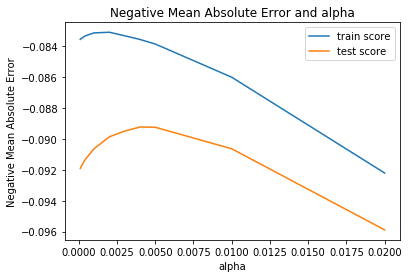

In [71]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
print(model_cv.best_estimator_)

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [73]:
lasso = Lasso(alpha=0.004)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)

mse=mean_squared_error(y_test, y_test_pred)
rmse=sqrt(mse)
print('Train R2 Score:', r2_train)
print('Model R2 Score:',r2_test)
print('Model MSE:', mse)
print('Model RMSE:',rmse)

Train R2 Score: 0.9033763896394233
Model R2 Score: 0.8837822658109484
Model MSE: 0.017247814012444046
Model RMSE: 0.13133093318957284


In [74]:
# Coefficient for 25 variables set to Zero
lasso.coef_

array([-0.        ,  0.01451934,  0.00896984,  0.02619239, -0.        ,
        0.        , -0.00341542,  0.0022469 , -0.        ,  0.01644312,
        0.00531625,  0.        ,  0.0885444 ,  0.03606626, -0.00448112,
        0.        ,  0.        ,  0.        ,  0.        ,  0.01318443,
       -0.        ,  0.        ,  0.00809088, -0.        ,  0.00399095,
        0.00492596,  0.01419586, -0.        ,  0.        , -0.        ,
        0.        ,  0.01755866,  0.01424792,  0.        ,  0.        ,
        0.        ,  0.04723875,  0.01643184,  0.        ,  0.01253519,
        0.00591554,  0.        , -0.00289243,  0.01550005,  0.00983738,
        0.01858448,  0.02888229,  0.00990115,  0.00907204,  0.01191541,
        0.03332741,  0.        ,  0.00069588,  0.00297075,  0.00471072,
       -0.        , -0.        , -0.01236122,  0.01139695, -0.04461759,
       -0.01804011,  0.00368166, -0.        ,  0.07686254])

#### LassoCV
Now let's apply another cross validation technique LassoCV to check if any better value of alpha can be found

In [75]:
# n_alphas: number of alpha values (automatically chosen) to try
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(n_alphas = 20, fit_intercept = True)
lasso_cv.fit(X_train, y_train)

# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = lasso_cv.predict(X_test)
print('coefficients:\n', lasso_cv.coef_)
print('best alpha:\n', lasso_cv.alpha_)

coefficients:
 [-0.          0.01451634  0.00889156  0.02622702 -0.          0.
 -0.00317133  0.00193963 -0.          0.01617709  0.00523292  0.
  0.08879773  0.03574103 -0.00427325  0.          0.          0.
  0.          0.01309601 -0.          0.          0.00812351 -0.
  0.0039325   0.00495014  0.01419424 -0.          0.         -0.
  0.          0.01744544  0.0142195   0.          0.          0.
  0.0472906   0.0161698   0.          0.01214588  0.00574452  0.
 -0.00267914  0.01555121  0.00949497  0.01832419  0.02883035  0.00978019
  0.0092387   0.01204006  0.03327372  0.          0.00060334  0.00280817
  0.00460882  0.         -0.         -0.01158476  0.01068165 -0.04455395
 -0.01810312  0.00340153 -0.          0.07714026]
best alpha:
 0.004251000188365197


Both LassoCV and GridSearchCV have identified same alpha 0.004, so going ahead with this.

In [76]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False).head(15)

,Features,Coefficient
7,OverallQual,0.0885
38,TotalSF,0.0769
17,GrLivArea,0.0472
8,OverallCond,0.0361
29,GarageArea,0.0333
25,Fireplaces,0.0289
2,LotArea,0.0262
24,Functional,0.0186
15,HeatingQC,0.0176
5,Condition1,0.0164


## 4. Conclusion :
<blockquote>The optimal lambda value in case of Ridge and Lasso is as below:

- Ridge - 100.0
- Lasso - 0.004

The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 0.017884
- Lasso - 0.017247

The Mean Squared Error in case of Lasso is lower compared to Ridge.

Train and Test R2 Score are as follows:
- Ridge: 0.905513, 0.879492
- Lasso: 0.903376, 0.883782
    
R2 Score as well is slightly better for Lasso. Additionally, feature selection capability of Lasso helped here to reduce some features by setting coefficient to 0. In this case, Lasso was able further reduce the number of features to 25 variables, so reduced the total number of features to 50.

Also for Lasso model, alpha value was not too low or high, so the influence of regularization is not huge, and less chance of over-fit or under-fit. **Hence Lasso model has been selected.**
    
But one thing to observe here is that, top predictor variables selected by both the models are similar, which gives us more confidence on the selected attributes. 8 out of top 10 predictor variables are common in both Lasso and Ridge models.

So based on the observations, below are the top 10 key predictor variables prescribed by the models for SalePrice prediction. They are ordered based on the coefficient value.

- **OverallQual** - Rates the overall material and finish of the house
- **TotalSF** - Total Square feet area (Derived feature)
- **GrLivArea** - Above grade (ground) living area square feet
- **OverallCond** - Rates the overall condition of the house
- **GarageArea** - Size of garage in square feet
- **Fireplaces** - Number of fireplaces
- **LotArea** - Lot size in square feet
- **Functional** - Home functionality (Assume typical unless deductions are warranted)
- **HeatingQC** - Heating quality and condition
- **Condition1** - Proximity to various conditions

Apart from that, there are other features which are significant too:

- BsmtFullBath
- KitchenQual
- MSZoning
- BsmtFinSF1
- CentralAir

</blockquote>



